## 부산 남구 21대 총선 선거구 예측 시뮬레이션
21대 총선에서 139000명 인구기준에 따라 부산 남구를 2개의 지역구로 분구할 수 있는 방법이 어떤지는 정치적으로 중요한 논란이 될 수 있는 주제입니다.

이 파일에서는 Python 프로그래밍 언어의 NumPy 라이브러리를 활용하고, NetworkX 라이브러리를 활용해 그래프가 연결된 그래프인지 끊겨있는 그래프인지를 확인하여 선거구 획정을 시뮬레이션하여보고, Python에서 그래프를 처리하는 방법을 학습할 수 있도록 구성했습니다.

In [1]:
import numpy as np
#부산 남구의 동별 이름을 저장합니다.
NamGu=['대연1동','대연3동','대연4동','대연5동','대연6동','용호1동','용호2동','용호3동','용호4동','용당동','감만1동','감만2동','우암동','문현1동','문현2동','문현3동','문현4동']
#부산 남구의 동별 인구를 저장합니다.
a=(19884,32486,12762,16992,16182,46220,18175,13222,9241,8429,15180,7452,15468,15356,9033,13112,10276)
import matplotlib as plt

In [2]:
import time

In [3]:
start = time.time()
b=np.zeros(131072,dtype='int32')
for i in range(131072):
    res = np.array([int(j) for j in list('{0:017b}'.format(i))])
    b[i]+=sum(res*a)
end = time.time()
print("time :", end - start)

time : 1.5933732986450195


In [4]:
#한 선거구 인구가 139470명 이상이면서, 14만명 이하인 선거구인지 여부를 참(True)/거짓(False)형태로 저장합니다.
c=(b<=140470)*(b>=139000)

In [5]:
#한 선거구 인구가 139470명 이상, 14만명 이하가 되게 하는 분할 방법의 총수를 구합니다. 이 방법은 선거구가 뚝 떨어진 2개 이상의 지역으로 갈라져 있는 경우를 포함합니다.
hubosu=np.sum(c)
print(hubosu)

1858


In [6]:
#668개의 선거구 후보에 대해, 특정한 동을 포함하는지 여부를 저장하는 단계입니다.
d=0
candid=np.zeros([hubosu,17],dtype='int32')
for i in range(131072):
    if c[i]==True:
        candid[d,:]=[int(j) for j in list('{0:017b}'.format(i))]
        d+=1

In [ ]:
pip install NetworkX

In [7]:
#파이썬에서 그래프를 처리할 수 있게 하는 NetworkX를 설치합니다.
import networkx as nx

In [8]:
#빈 그래프를 생성합니다.
G =nx.Graph()

In [9]:
#부산 남구의 모든 행정동을 그래프의 점(노드)로 추가합니다.
G.add_nodes_from(NamGu)

In [10]:
#부산 남구의 모든 서로 접하는 행정동 쌍을 그래프의 모서리(엣지)로 추가합니다. 
G.add_edges_from([('대연1동','대연3동'),('대연1동','대연4동'),('대연1동','대연5동'),('대연1동','대연6동'),('대연1동','우암동'),('대연1동','문현3동'),('대연1동','문현4동')])
G.add_edges_from([('대연3동','대연4동'),('대연3동','대연5동'),('대연3동','용호1동'),('대연3동','용당동'),('대연3동','문현1동')])
G.add_edges_from([('대연4동','용당동'),('대연4동','감만2동'),('대연4동','우암동')])
G.add_edges_from([('대연5동','대연6동'),('대연5동','문현1동')])
G.add_edges_from([('대연6동','문현1동'),('대연6동','문현3동')])
G.add_edges_from([('용호1동','용호3동'),('용호1동','용호4동'),('용호1동','용당동')])
G.add_edges_from([('용호2동','용호3동'),('용호2동','용호4동')])
G.add_edges_from([('용호4동','용당동')])
G.add_edges_from([('용당동','감만1동'),('용당동','감만2동')])
G.add_edges_from([('감만1동','감만2동'),('감만1동','우암동')])
G.add_edges_from([('감만2동','우암동'),('우암동','문현4동')])
G.add_edges_from([('문현1동','문현2동'),('문현1동','문현3동')])
G.add_edges_from([('문현2동','문현3동'),('문현2동','문현4동')])
G.add_edges_from([('문현3동','문현4동')])

In [11]:
#부산 남구의 행정동이 그래프에 잘 추가되었나 확인합니다.
G.nodes

NodeView(('대연1동', '대연3동', '대연4동', '대연5동', '대연6동', '용호1동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현1동', '문현2동', '문현3동', '문현4동'))

In [12]:
#부산 남구의 행정동을 잇는 선분들이 그래프에 잘 추가되었나 확인합니다.
G.edges

EdgeView([('대연1동', '대연3동'), ('대연1동', '대연4동'), ('대연1동', '대연5동'), ('대연1동', '대연6동'), ('대연1동', '우암동'), ('대연1동', '문현3동'), ('대연1동', '문현4동'), ('대연3동', '대연4동'), ('대연3동', '대연5동'), ('대연3동', '용호1동'), ('대연3동', '용당동'), ('대연3동', '문현1동'), ('대연4동', '용당동'), ('대연4동', '감만2동'), ('대연4동', '우암동'), ('대연5동', '대연6동'), ('대연5동', '문현1동'), ('대연6동', '문현1동'), ('대연6동', '문현3동'), ('용호1동', '용호3동'), ('용호1동', '용호4동'), ('용호1동', '용당동'), ('용호2동', '용호3동'), ('용호2동', '용호4동'), ('용호4동', '용당동'), ('용당동', '감만1동'), ('용당동', '감만2동'), ('감만1동', '감만2동'), ('감만1동', '우암동'), ('감만2동', '우암동'), ('우암동', '문현4동'), ('문현1동', '문현2동'), ('문현1동', '문현3동'), ('문현2동', '문현3동'), ('문현2동', '문현4동'), ('문현3동', '문현4동')])

In [13]:
#그래프를 시각화하기 위해 각 행정동에 대응되는 적절한 좌표를 지정합니다.
pos={'대연1동':np.array([0.45,0.6]),'대연3동':np.array([0.6,1]),'대연4동':np.array([0.5,0.5]),'대연5동':np.array([0.5,0.9]),'대연6동':np.array([0.4,0.8]),'용호1동':np.array([0.65,0.4]),'용호2동':np.array([0.7,0.1]),'용호3동':np.array([0.7,0.3]),'용호4동':np.array([0.6,0.1]),'용당동':np.array([0.5,0.2]),'감만1동':np.array([0.3,0.2]),'감만2동':np.array([0.4,0.4]),'우암동':np.array([0.3,0.5]),'문현1동':np.array([0.3,0.9]),'문현2동':np.array([0.25,0.8]),'문현3동':np.array([0.3,0.7]),'문현4동':np.array([0.25,0.6])}

In [14]:
#그래프를 출력하기 위해 matplotlib을 불러옵니다.
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


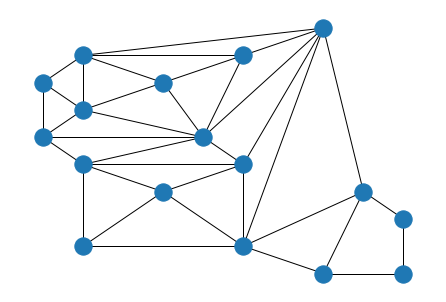

In [15]:
#지도와 대조해 보시면, 부산 남구와 연결 상태가 같은 그래프라는 것을 확인할 수 있습니다.
nx.draw(G,pos)
plt.show()

In [16]:
#Python 폰트 문제로 한글 출력이 그래프를 그릴때 안되는 문제를 해결하기 위해, 동 명에 영어 표기를 대응시킵니다..
NamGuDict={'대연1동':'Daeyeon1','대연3동':'Daeyeon3','대연4동':'Daeyeon4','대연5동':'Daeyeon5','대연6동':'Daeyeon6','용호1동':'Yongho1','용호2동':'Yongho2','용호3동':'Yongho3','용호4동':'Yongho4','용당동':'Yongdang','감만1동':'Gamman1','감만2동':'Gamman2','우암동':'U-am','문현1동':'Munhyeon1','문현2동':'Munhyeon2','문현3동':'Munhyeon3','문현4동':'Munhyeon4'}

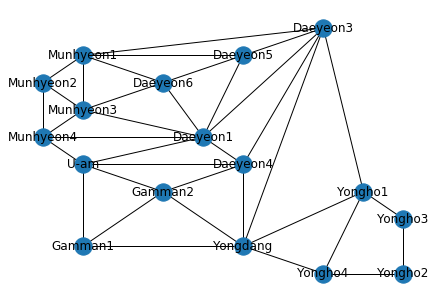

In [17]:
nx.draw(G, pos, labels=NamGuDict)

In [18]:
#후보가 되는 선거구 들 중 그 선거구도 연속되어 있고, 부산 남구의 나머지 지역을 차지한 선거구도 연속되어 있는 것을 출력합니다.
a2=np.array(a,dtype='int32')
#이때 부산 남구의 행정동명을 담은 배열을 NumPy 배열로 변환합니다.
NamGu1=np.array(NamGu)
for i in range(hubosu):
    value=candid[i,:]
    H=G.subgraph(list(NamGu1[value==0]))
    H2=G.subgraph(list(NamGu1[value==1]))
    if nx.is_connected(H) & nx.is_connected(H2):
        print(list(NamGu1[value==1]),sum(a2[value==1]),'명')
 

['대연5동', '대연6동', '용호2동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현2동', '문현3동', '문현4동'] 139540 명
['대연4동', '대연6동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현3동', '문현4동'] 139499 명
['대연4동', '대연5동', '대연6동', '용당동', '감만1동', '감만2동', '우암동', '문현1동', '문현2동', '문현3동', '문현4동'] 140242 명
['대연3동', '용호1동', '용호3동', '문현1동', '문현2동', '문현3동', '문현4동'] 139705 명
['대연3동', '대연5동', '대연6동', '용호1동', '문현1동', '문현3동'] 140348 명
['대연3동', '대연5동', '대연6동', '용호1동', '용호3동', '문현1동'] 140458 명
['대연3동', '대연4동', '용호1동', '문현1동', '문현2동', '문현3동', '문현4동'] 139245 명
['대연3동', '대연4동', '용호1동', '용호3동', '문현1동', '문현2동', '문현4동'] 139355 명
['대연3동', '대연4동', '용호1동', '용호2동', '용호3동', '용호4동', '감만2동'] 139558 명
['대연3동', '대연4동', '대연6동', '용호1동', '감만2동', '문현1동', '문현2동'] 139491 명
['대연3동', '대연4동', '대연5동', '용호1동', '감만2동', '문현1동', '문현2동'] 140301 명
['대연3동', '대연4동', '대연5동', '용호1동', '용호2동', '용호3동'] 139857 명
['대연3동', '대연4동', '대연5동', '대연6동', '용호1동', '문현1동'] 139998 명
['대연1동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현2동', '문현3동', '문현4동

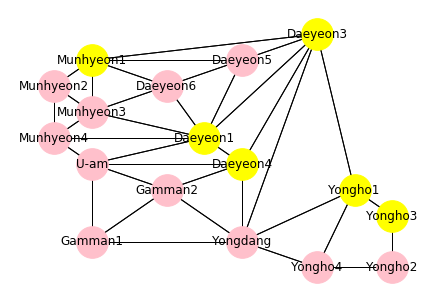

In [20]:
nx.draw(G, pos, labels=NamGuDict, nodelist=['대연5동', '대연6동', '용호2동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현2동', '문현3동', '문현4동'],
                       node_color='#FFC0CB', 
                       node_size=1000) 
nx.draw(G, pos, nodelist=['대연1동', '대연3동', '대연4동', '용호1동', '용호3동', '문현1동'], node_color='#FFFF00', node_size=1000)

plt.show()

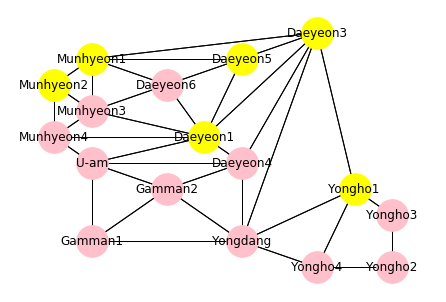

In [21]:
nx.draw(G, pos, labels=NamGuDict, nodelist=['대연4동', '대연6동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현3동', '문현4동'],
                       node_color='#FFC0CB', 
                       node_size=1000) 
nx.draw(G, pos, nodelist=['대연1동', '대연3동', '대연5동', '용호1동', '문현1동', '문현2동'], node_color='#FFFF00', node_size=1000)

plt.show()

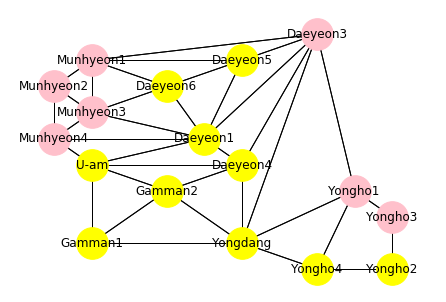

In [22]:
nx.draw(G, pos, labels=NamGuDict, nodelist=['대연3동', '용호1동', '용호3동', '문현1동', '문현2동', '문현3동', '문현4동'],
                       node_color='#FFC0CB', 
                       node_size=1000) 
nx.draw(G, pos, nodelist=['대연1동', '대연4동', '대연5동', '대연6동', '용호2동', '용호4동', '용당동', '감만1동', '감만2동', '우암동'], node_color='#FFFF00', node_size=1000)

plt.show()

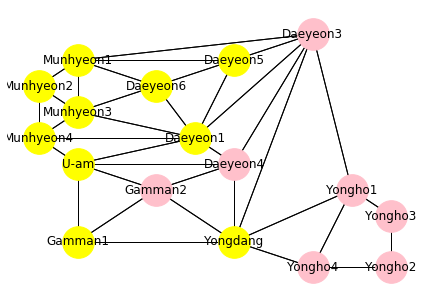

In [23]:
nx.draw(G, pos, labels=NamGuDict, nodelist=['대연3동', '대연4동', '용호1동', '용호2동', '용호3동', '용호4동', '감만2동'],
                       node_color='#FFC0CB', 
                       node_size=1000) 
nx.draw(G, pos, nodelist=['대연1동', '대연5동', '대연6동', '용당동', '감만1동', '우암동', '문현1동', '문현2동', '문현3동', '문현4동'], node_color='#FFFF00', node_size=1000)

plt.show()

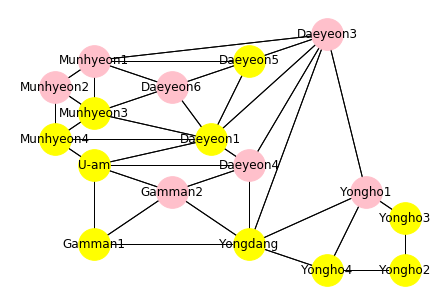

In [24]:
nx.draw(G, pos, labels=NamGuDict, nodelist=['대연3동', '대연4동', '대연6동', '용호1동', '감만2동', '문현1동', '문현2동'],
                       node_color='#FFC0CB', 
                       node_size=1000) 
nx.draw(G, pos, nodelist=['대연1동', '대연5동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '우암동', '문현3동', '문현4동'], node_color='#FFFF00', node_size=1000)

plt.show()

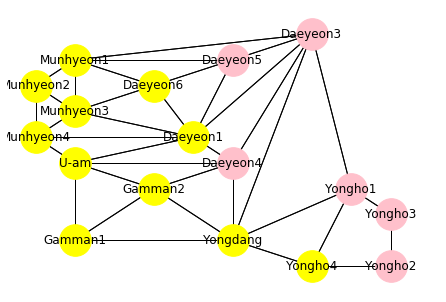

In [25]:
nx.draw(G, pos, labels=NamGuDict, nodelist=['대연3동', '대연4동', '대연5동', '용호1동', '용호2동', '용호3동'],
                       node_color='#FFC0CB', 
                       node_size=1000) 
nx.draw(G, pos, nodelist=['대연1동', '대연6동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현1동', '문현2동', '문현3동', '문현4동'], node_color='#FFFF00', node_size=1000)

plt.show()

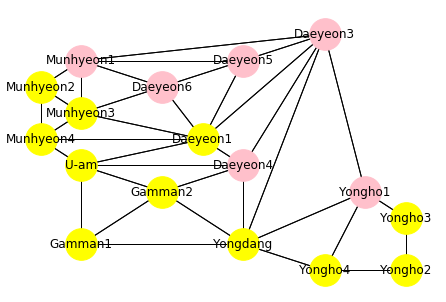

In [26]:
nx.draw(G, pos, labels=NamGuDict, nodelist=['대연3동', '대연4동', '대연5동', '대연6동', '용호1동', '문현1동'],
                       node_color='#FFC0CB', 
                       node_size=1000) 
nx.draw(G, pos, nodelist=['대연1동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현2동', '문현3동', '문현4동'], node_color='#FFFF00', node_size=1000)

plt.show()